<a href="https://colab.research.google.com/github/sameeramin/iris-classification/blob/main/Boston_Houses_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.7.0'

## Loading Libraries and Datasets

In [ ]:
from tensorflow.keras import models, layers, utils
from tensorflow.keras.datasets import boston_housing
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

train_data.shape, test_data.shape

((404, 13), (102, 13))

## Preparing Data

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

## Building Model

In [ ]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

## K-Fold

In [ ]:
k = 4
num_value_samples = len(train_data) // k # // returns int value and ignores values after decimal point
num_epochs = 500
all_scores = []
all_mae_history = []
for i in range(k):
  print("Processing fold #", i)
  val_data = train_data[i * num_value_samples: (i + 1) * num_value_samples]
  val_target = train_target[i * num_value_samples: (i +1) * num_value_samples]
  partial_train_data = np.concatenate([train_data[:i * num_value_samples], train_data[(i + 1) * num_value_samples:]])
  partial_train_targets = np.concatenate([train_target[:i * num_value_samples], train_target[(i + 1) * num_value_samples :]])

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
  all_scores.append(val_mae)
  mae_history = history.history['mae']
  all_mae_history.append(mae_history)


Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


## Erros

In [ ]:
average_mae_history = [ np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs) ]

print("All fold validation errors: ", all_scores)
print("mean of all fold validation errors: ", all_scores)
print("Average MAE history: ", average_mae_history)

All fold validation errors:  [2.1856579780578613, 2.3015382289886475, 2.7187371253967285, 2.568828582763672]
mean of all fold validation errors:  [2.1856579780578613, 2.3015382289886475, 2.7187371253967285, 2.568828582763672]
Average MAE history:  [21.520516395568848, 19.886757373809814, 18.087434768676758, 15.988220691680908, 13.668171644210815, 11.265936613082886, 9.028812170028687, 7.3831599950790405, 6.228355646133423, 5.438827037811279, 4.805107355117798, 4.300787687301636, 3.9399463534355164, 3.649919033050537, 3.4356780648231506, 3.2830182909965515, 3.179845869541168, 3.0833611488342285, 2.971055746078491, 2.957282543182373, 2.844732880592346, 2.7774704694747925, 2.7252960205078125, 2.67964905500412, 2.6107922792434692, 2.5814018845558167, 2.5305728912353516, 2.4973796010017395, 2.4403006434440613, 2.4341827034950256, 2.399995744228363, 2.3735538721084595, 2.338748812675476, 2.3309377431869507, 2.2954484820365906, 2.287599742412567, 2.245698928833008, 2.257611870765686, 2.237450

## Plotting errors

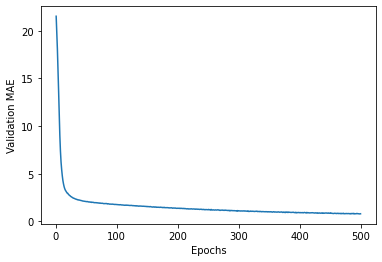

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

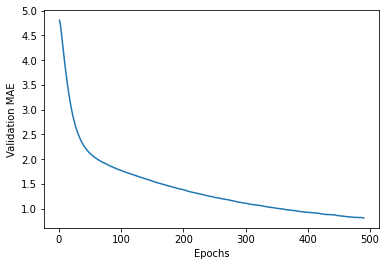

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
#  Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data. 
model.fit(train_data, train_target, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_target)

4/4 [==============================] - 0s 4ms/step - loss: 19.2525 - mae: 2.6556
